# Skymaps Overview

In this notebook, we will discuss:
- Ring Skymaps (the lsst.skymap class to which our original LSST skymap belongs)
- Some basic properties of ring skymaps
- The definitions and differences of tracts (inner region), tracts (outer polygons), and patches

In [1]:
from skymap_convert._internal.examples import demo_rings_plot, demo_rings_tracts_plot

## The anatomy of a ring skymap

In a ring skymap, we divide the sky into horizontal rings.

The LSST skymap has over 200 rings. For illustrative purposes, let us imagine a skymap with 5 rings:

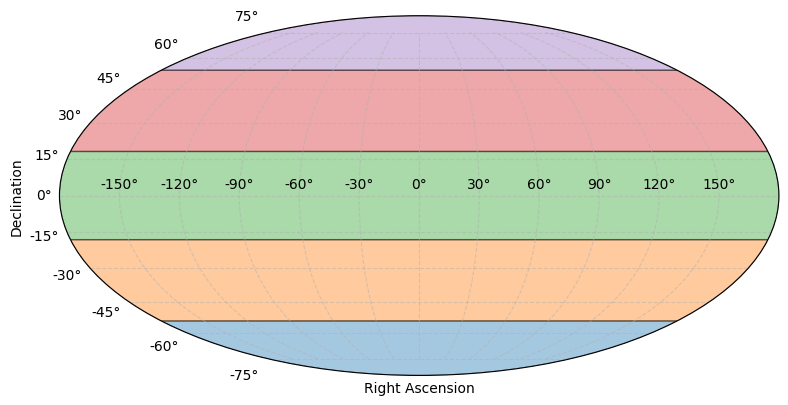

In [2]:
demo_rings_plot()

Then, we divide each of those things into tracts (inner region).

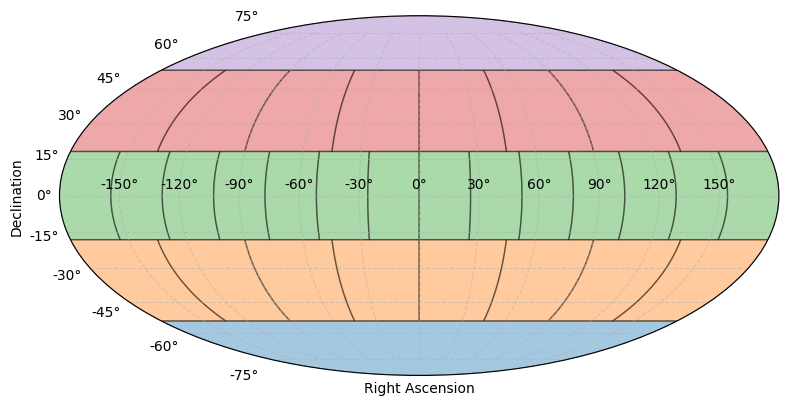

In [3]:
demo_rings_tracts_plot()

## Tracts and patches

Some basic properties of tracts (inner region) are:<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1)
- "We divide the sphere into N rings of Declination, plus the two polar caps, which sets the size of the individual tracts."
- "The rings are
    divided in RA into an integral number of tracts of this size; this
    division is made at the Declination closest to zero so as to ensure
    full overlap."

However, note that for patches:<a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2)
- "The tract is subdivided into rectangular patches."
- "The inner regions of the patches exactly tile the tract, and all inner regions have the same dimensions." 
- Patches *do* need spherical geometry/knowledge of the WCS to calculate. 
  - So, these are the reason we've made our converted skymaps be a vertex dump, rather than the lighter-weight legacy version, RingOptimizedSkymap.

<a name="cite_note-1"></a>1. [^](#cite_ref-1) `lsst.skymap`, `RingsSkyMap` docstring  
<a name="cite_note-2"></a>2. [^](#cite_ref-2) `lsst.skymap`, `TractInfo` docstring

Note that patches can and do "overflow" beyond the boundaries of the tract (inner region).

Let's take a look at some tracts and patches from our skymap.

First, let's load the skymap reader.

In [ ]:
from pathlib import Path

from skymap_convert._internal.examples import plot_patches_in_tract
from skymap_convert import ConvertedSkymapReader


reader = ConvertedSkymapReader(preset="lsst_skymap")

Now, let's take a look at a tract near the equator.

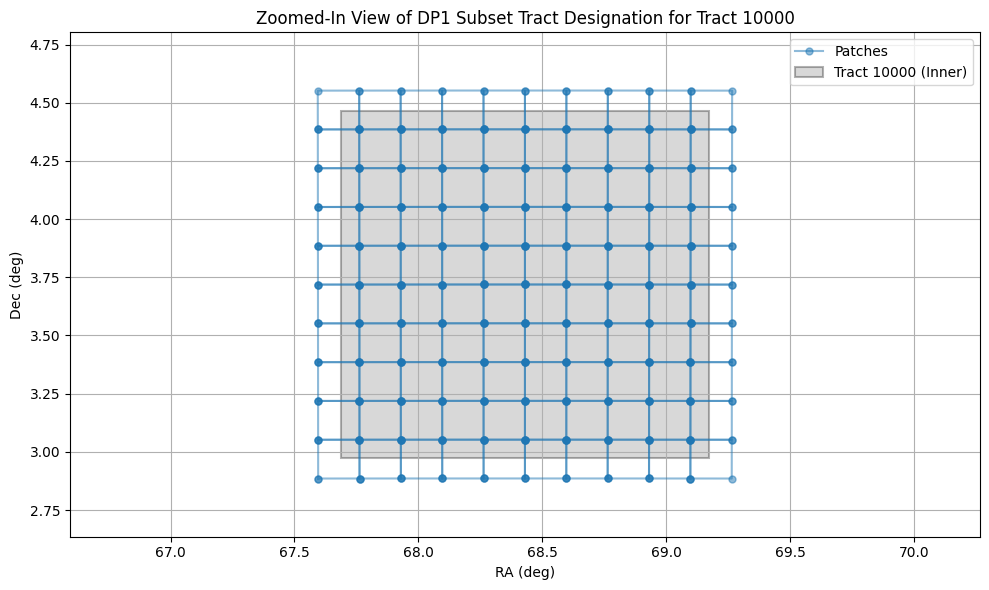

In [5]:
plot_patches_in_tract(reader, 10_000)

Note that tracts become more degenerate as we approach either of the poles ~~(because spheres are evil)~~.

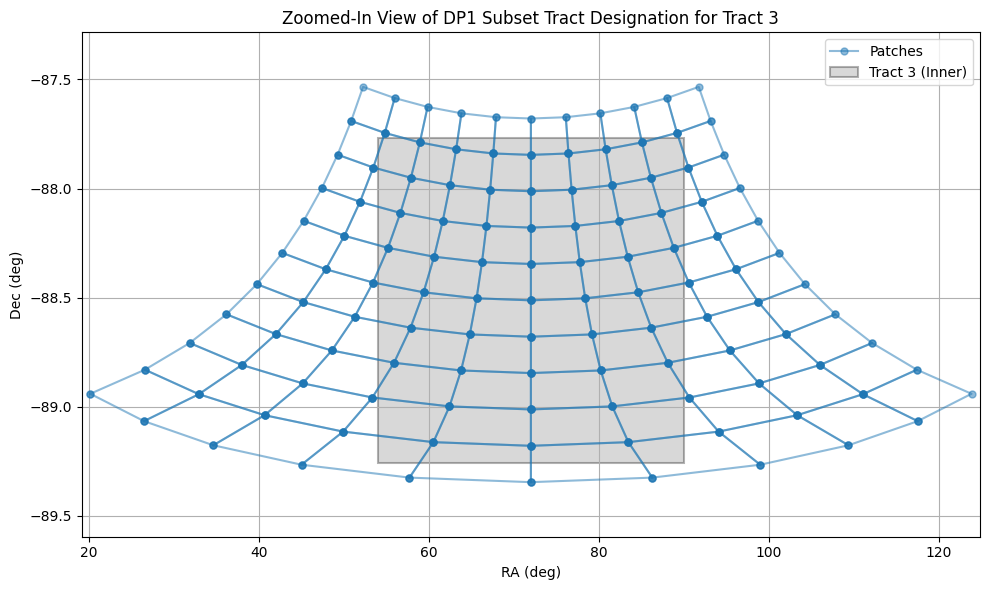

In [6]:
plot_patches_in_tract(reader, 3)

 If we draw a boundary based on the outside boundary of all the patches in a tract, we get the bounds of the tract (outer polygon).  

 However, tract (outer polygon) is generally unneccessary to know—but we mention it so we don't get it confused with tract (inner region).

## Applied to DP1 tract classifications

 Based on a quick sketch with DP1 data, the tract that an object is assigned to appears to be based on the tract (inner region).

*ASK NEVEN: This is ok, right, if we make sure to only show ra/dec (and no prints) of a limited number of points?*

In [7]:
import lsdb

In [8]:
from dask.distributed import Client

client = Client(n_workers=4, memory_limit="auto")

In [9]:
dp1_object_collection = lsdb.open_catalog(
    "/sdf/data/rubin/shared/lsdb_commissioning/hats/v29_0_0/dia_object_collection",
    columns=["dec", "ra", "tract"],
)
dp1_object_box = dp1_object_collection.box_search(ra=[37.75, 40.0], dec=[6.0, 7.75])

In [10]:
dp1_computed = dp1_object_box.compute()

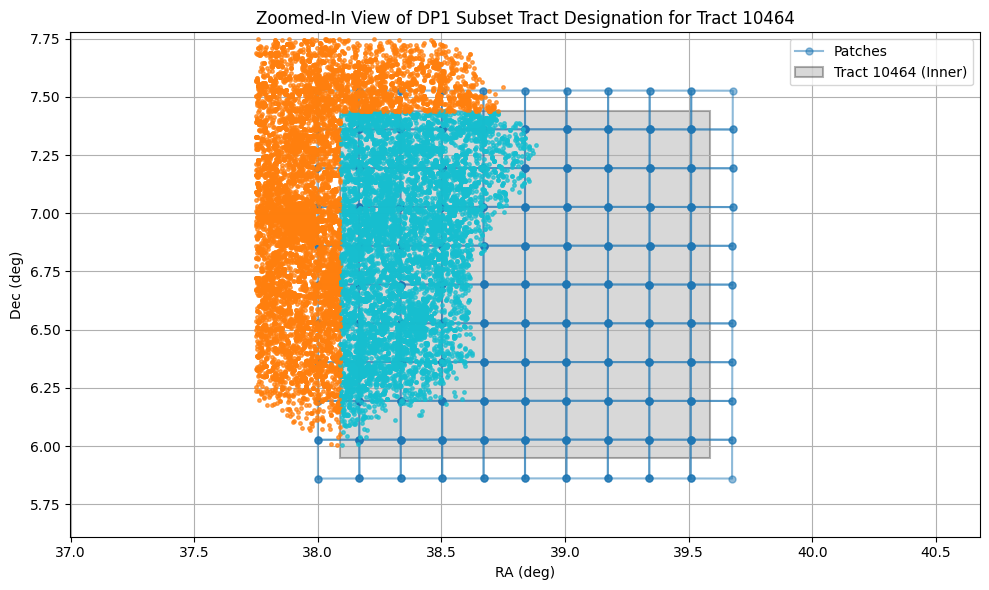

In [11]:
plot_patches_in_tract(reader, 10464, data=dp1_computed)

Since tracts (inner region) are designed such that they cover the entire (~~stupidly spherical~~) sky with no gaps or overlaps, we can infer the existence of a surjective function mapping from the set of all possible radec sphere coordinates to the set of tracts in our skymap.

That is to say, if we have a radec coordinate, we have exactly one tract to which it corresponds. Neat!

## About  

**Author:** Olivia Lynn

**Last updated on:** July 11, 2025